# SVM - Non-linear SVR

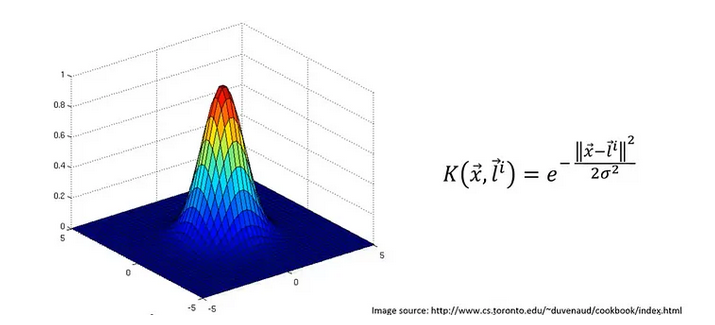

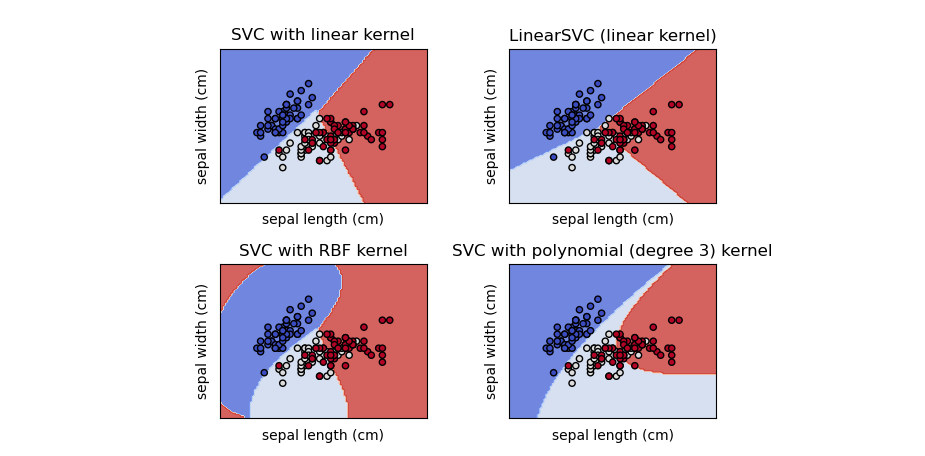

### The descision boundary
#### - Optimized for this dataset because the data is Not Linearly Seperable
#### - The assumption is, that the data is Linearly Seperable to place the descision boundaries
#### - The linear assumption will not perform well on this dataset
### A Higher-Dimensional Space
#### - 1D e.g. f = x - 5 (constant) and is represented as 1 dot datapoint
#### - 2D e.g. f = (x - 5)^2 and is represented as 2D Linear Seperator - Mapping function could present the non-linear as a Linear Seperator in a 3D space (Hyperplane)
#### - 3D e.g. Projection from the 3D space (Hyperplane) to the 2D place
##### IMPORTANT - Mapping higher dimensional space is highly compute-intensive and is solved with the Kernel Trick
### The Kernel Trick
#### The Gaussian RBF Kernel
##### - Function applied to 2 vectors (Sigma and Landmark)
##### - Central of the 2D space is 0, 0 and is the landmark
##### - Sigma is a fixed defined parameter
##### - Vertical axis represents the calculated points on the plane 
##### - The tip of the Landmark projects to the bottom Landmark (Kernel) - The location from which distance is measured and values are evaluated
##### - As a data point is close to the Landmark, the value will be nearing 0, 0 that is the location of the Landmark from which we measure the distance to data points
##### - The Landmark will in this example be utilized as the algorithm for determining corralations in the dataset
##### - Besides Gaussian RBF Kernel the Sigmoid Kernel and Polynomial Kernel is also very popular
### The dataset is a dataset consisting of 250 observations.
#### Classification using a non-linear SVR classifier will be performed on this dataset to determine labels based on features
#### The independent variables Age and Expected Salary will be used to predict the dependent variable Purchased

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the Train and Test sets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
X_train

array([[    39,  71000],
       [    28,  59000],
       [    28,  44000],
       [    31,  15000],
       [    19,  25000],
       [    60, 102000],
       [    53, 143000],
       [    46,  22000],
       [    22,  81000],
       [    47,  25000],
       [    41,  51000],
       [    32, 117000],
       [    33,  60000],
       [    19,  76000],
       [    28,  89000],
       [    25,  87000],
       [    40,  75000],
       [    29,  83000],
       [    24,  19000],
       [    49,  28000],
       [    20,  74000],
       [    28, 123000],
       [    35,  91000],
       [    27,  17000],
       [    32,  18000],
       [    27,  57000],
       [    26,  35000],
       [    46,  23000],
       [    31,  74000],
       [    37, 144000],
       [    27,  20000],
       [    23,  48000],
       [    20,  82000],
       [    31,  34000],
       [    48,  29000],
       [    20,  82000],
       [    33,  41000],
       [    27,  58000],
       [    35,  22000],
       [    30,  80000],


In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
X_test

array([[    41,  52000],
       [    29, 148000],
       [    18,  52000],
       [    26,  15000],
       [    24,  89000],
       [    33, 113000],
       [    23,  20000],
       [    32, 135000],
       [    46,  96000],
       [    35,  58000],
       [    35,  25000],
       [    49,  74000],
       [    35,  88000],
       [    35,  47000],
       [    25,  90000],
       [    39, 134000],
       [    24,  55000],
       [    35,  75000],
       [    42,  80000],
       [    26,  15000],
       [    41,  71000],
       [    23,  63000],
       [    37,  33000],
       [    35,  50000],
       [    28,  84000],
       [    52, 114000],
       [    30,  49000],
       [    37,  71000],
       [    32, 120000],
       [    38,  80000],
       [    40,  59000],
       [    25,  33000],
       [    28,  32000],
       [    59,  83000],
       [    26,  84000],
       [    27,  58000],
       [    48,  41000],
       [    39,  61000],
       [    20,  86000],
       [    34,  43000],


In [7]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[ 0.62172286,  0.16417863],
       [-0.50000992, -0.18817396],
       [-0.50000992, -0.6286147 ],
       [-0.1940828 , -1.48013346],
       [-1.41779128, -1.1865063 ],
       [ 2.76321271,  1.07442282],
       [ 2.04938276,  2.27829416],
       [ 1.33555281, -1.27459445],
       [-1.11186416,  0.45780578],
       [ 1.43752852, -1.1865063 ],
       [ 0.82567427, -0.42307569],
       [-0.09210709,  1.51486355],
       [ 0.00986862, -0.15881125],
       [-1.41779128,  0.31099221],
       [-0.50000992,  0.69270751],
       [-0.80593704,  0.63398208],
       [ 0.72369857,  0.28162949],
       [-0.39803421,  0.51653122],
       [-0.90791275, -1.3626826 ],
       [ 1.64147993, -1.09841815],
       [-1.31581558,  0.25226677],
       [-0.50000992,  1.69103985],
       [ 0.21382003,  0.75143294],
       [-0.60198563, -1.42140803],
       [-0.09210709, -1.39204531],
       [-0.60198563, -0.2468994 ],
       [-0.70396133, -0.89287914],
       [ 1.33555281, -1.24523173],
       [-0.1940828 ,

# The Non-linear SVR Model

## Training the Non-linear SVR Model

In [11]:
# Uses a non-linear kernel
# The RBF function projects the data points
# The data points can now be projected from a non-linear 2D plane representation into a linear representation on the 3D plane
# When the Hyperplane is fitted to the data, the point / line of intersect is the 2D line
# The data points between the spaced in the Hyperplane will not be considered - The Epsilon Sensitive Space
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',
                random_state = 0)

classifier.fit(X_train, y_train)

SVC(random_state=0)

### Predicting a new result

In [12]:
classifier.predict(sc.transform([[30,87000]]))

array([0], dtype=int64)

### Predicting the Test set results

In [13]:
# y_pred the matrix values of predictions
y_pred = classifier.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0]], dtype=int64)

# Visualizing The Non-linear SVR Model

## The Training set results

C:\Users\r\AppData\Local\Temp\ipykernel_4204\211872820.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


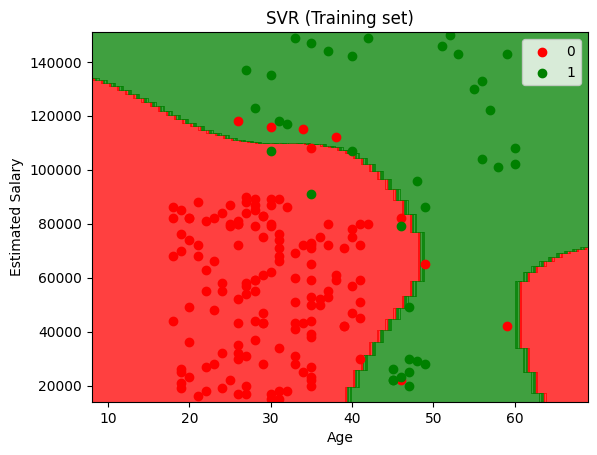

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVR (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## The Test set results

C:\Users\r\AppData\Local\Temp\ipykernel_4204\2050760941.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


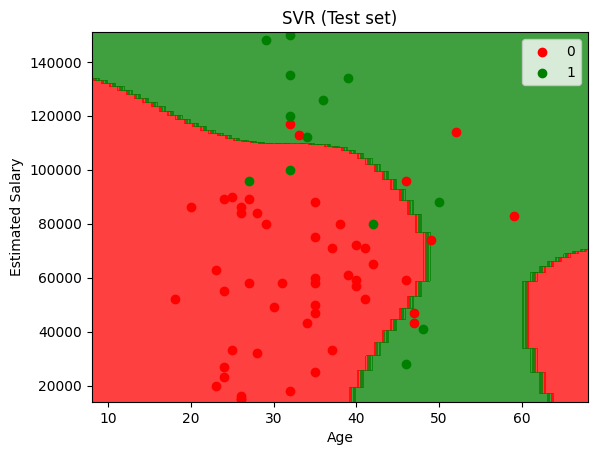

In [15]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVR (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Conclusion
#### This SVM Non-linear SVR Model performs better on this dataset that e.g. SVMNetworkAds.ipynb
#### Same level of performance as KNNNetworkAds.ipynb